<a href="https://colab.research.google.com/github/diptivs/machine_learning/blob/master/Final_Exam_NELA_Spam_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sqlite3
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
# Setup google auth
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authttps://drive.google.com/open?id=1-MdGo8vMMLWMZBcb_K0dKz56FzNEra7Whenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#https://drive.google.com/open?id=1-MdGo8vMMLWMZBcb_K0dKz56FzNEra7W
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1-MdGo8vMMLWMZBcb_K0dKz56FzNEra7W'
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('nela_score_values_reduced_ds.csv')
train_news = pd.read_csv('nela_score_values_reduced_ds.csv')
train_news.head(5)

,Unnamed: 0,Unnamed: 0.1,date,source,name,content,aggregated
0,0,0,2018-02-01,DC Gazette,SHOCKER Key GOP House Member TREY GOWDY Not Se...,"It wasnt exactly widely known, but South Carol...",1.0
1,1,1,2018-02-01,DC Gazette,Saudi Arabia Seizes BILLIONS In Anti-Corruptio...,Amazing what happens when a government activel...,1.0
2,2,2,2018-02-01,Freedom Outpost,10 Amazing Facts About Americas Economic Recov...,If the U.S. economy continues to surge under P...,1.0
3,3,3,2018-02-01,Freedom Outpost,Democrats Have Absolutely No Class They Put It...,After observing the despicable behavior of the...,1.0
4,4,4,2018-02-01,Freedom Outpost,ReleaseTheMemo Even Democrats Are Admitting Th...,Never before has there been so much talk about...,1.0


In [0]:
train_news['name'][0]

'SHOCKER Key GOP House Member TREY GOWDY Not Seeking Re-Election'

In [0]:
df_processor=train_news.dropna(how='any',axis=0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class SpamScoreFeature():
    def __init__(self): 
        #load the dataset
                
        file_id = '1FXa-YARiutchrOzQ-g2_cF945QPZrF86'
        downloaded = drive.CreateFile({'id':file_id}) 
        downloaded.GetContentFile('spam_dict.csv')
        
        #load the spam dictionary
        spam_dict = pd.read_csv('spam_dict.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
        spam_dict = spam_dict.fillna(0)
        spam_dict = spam_dict.iloc[1:]

        tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1, lowercase=False)
        
        spam_dict = spam_dict.drop_duplicates()

        X_train, X_test, y_train, y_test = train_test_split(df_processor[['name']], df_processor['aggregated'].apply(np.int64), test_size=0.25, random_state=42)

      

        # spam_dict.head(5)
        #Count vector for train data
        spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
        train_count = spamcountV.fit_transform(X_train['name'])
       
   
        self.logR_pipeline = Pipeline([
            ('NBCV',spamcountV),
            ('nb_clf',MultinomialNB())])
             
        

        self.logR_pipeline.fit(X_train['name'],y_train)
        predicted_LogR = self.logR_pipeline.predict(X_test['name'])
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Spam Score Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        print(bool(predicted))
        return  float(predicedProb)

In [0]:
spamscore = SpamScoreFeature()

Spam Score Model Trained - accuracy:   0.334267


In [0]:
spamscore.predict("SHOCKER Key GOP House Member TREY GOWDY Not Seeking Re-Election")

True


0.15924246465724196

In [0]:
spam_score=[]
df_processor['spam_score']=0
len(df_processor)
for i in df_processor.index:
  x=spamscore.predict(df_processor['name'][i])
  #print(i)
  df_processor['spam_score']=x
  #print(df_processor['spam_score'][i])


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [0]:
df_processor.tail(5)

,Unnamed: 0,Unnamed: 0.1,date,source,name,content,aggregated,spam_score
20036,3974,3974,2018-11-21,WSJ Washington Wire,Capital Journal Trump Stands By Saudi Arabia O...,This is the web version of the WSJs Capital Jo...,5.0,0.159242
20037,3975,3975,2018-11-23,WSJ Washington Wire,Capital Journal Trumps Border Calls US Urges A...,This is the web version of the WSJs Capital Jo...,5.0,0.159242
20038,3976,3976,2018-11-26,WSJ Washington Wire,Capital Journal Critical Lame-Duck Session Com...,This is the web version of the WSJs Capital Jo...,5.0,0.159242
20039,3977,3977,2018-11-27,WSJ Washington Wire,Capital Journal Trump Talks China and GM With ...,This is the web version of the WSJs Capital Jo...,5.0,0.159242
20040,3978,3978,2018-11-29,WSJ Washington Wire,Capital Journal Newsletter Democrats Rift Trum...,This is the web version of the WSJs Capital Jo...,5.0,0.159242


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_processor[['spam_score']], df_processor['aggregated'].apply(np.int64), test_size=0.25, random_state=42)


In [0]:
accuracies = {}

##Multinomial Bayes

In [0]:
nb = MultinomialNB(alpha=1)

In [0]:
%time nb.fit(X_train, y_train)

CPU times: user 7.93 ms, sys: 4.04 ms, total: 12 ms
Wall time: 12 ms


MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [0]:
y_mnb_pred = nb.predict(X_test)
print(y_mnb_pred)

[4 4 4 ... 4 4 4]


In [0]:
from sklearn.metrics import accuracy_score
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, y_mnb_pred)
accuracies['MultinomialNB'] = accuracy_test
print('accuracy_score on test dataset MultinomialNB : ', accuracy_test)

accuracy_score on test dataset MultinomialNB :  0.33426685337067413


##Descision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

clf = DecisionTreeClassifier(criterion='entropy', max_depth =2, min_samples_split=2, min_samples_leaf=6)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

In [0]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, prediction)
accuracies['Descision Tree'] = accuracy_test
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.33426685337067413


##SVM

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train,y_train) 
prediction = clf.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, prediction)
accuracies['SVM'] = accuracy_test
print('accuracy_score on test dataset : ', accuracy_test)

print(classification_report(y_test,prediction))

accuracy_score on test dataset :  0.33426685337067413
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00       795
           3       0.00      0.00      0.00       965
           4       0.33      1.00      0.50      1671
           5       0.00      0.00      0.00       147

    accuracy                           0.33      4999
   macro avg       0.07      0.20      0.10      4999
weighted avg       0.11      0.33      0.17      4999



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, prediction)
accuracies['KNN'] = accuracy_test
print('accuracy_score on test dataset : ', accuracy_test)

print(classification_report(y_test,prediction))

accuracy_score on test dataset :  0.33426685337067413
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00       795
           3       0.00      0.00      0.00       965
           4       0.33      1.00      0.50      1671
           5       0.00      0.00      0.00       147

    accuracy                           0.33      4999
   macro avg       0.07      0.20      0.10      4999
weighted avg       0.11      0.33      0.17      4999



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
prediction=lg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, prediction)
accuracies['Logistic Regression'] = accuracy_test
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.33426685337067413


In [0]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00       795
           3       0.00      0.00      0.00       965
           4       0.33      1.00      0.50      1671
           5       0.00      0.00      0.00       147

    accuracy                           0.33      4999
   macro avg       0.07      0.20      0.10      4999
weighted avg       0.11      0.33      0.17      4999



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##Linear Regression

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1421
           2       0.00      0.00      0.00       795
           3       0.19      1.00      0.32       965
           4       0.00      0.00      0.00      1671
           5       0.00      0.00      0.00       147

    accuracy                           0.19      4999
   macro avg       0.04      0.20      0.06      4999
weighted avg       0.04      0.19      0.06      4999



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[   0    0 1421    0    0]
 [   0    0  795    0    0]
 [   0    0  965    0    0]
 [   0    0 1671    0    0]
 [   0    0  147    0    0]]
accuracy_score on test dataset :  0.1930386077215443


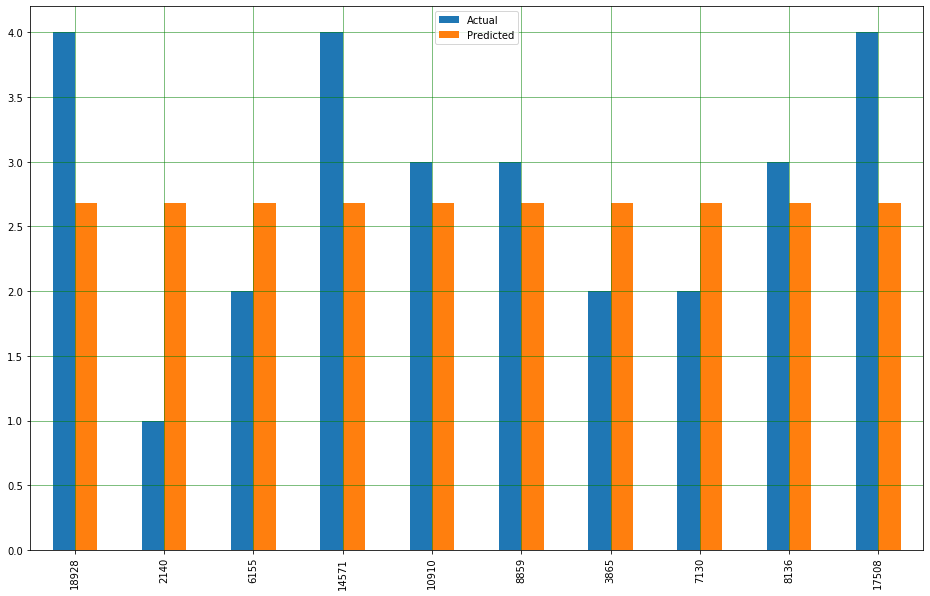

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

prediction = regressor.predict(X_test)

print(classification_report(y_test,prediction.round()))

print(confusion_matrix(y_test,prediction.round()))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, prediction.round())
accuracies['Linear Regression'] = accuracy_test
print('accuracy_score on test dataset : ', accuracy_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##Result

In [0]:
from IPython.display import display, HTML
table = "<table><thead><tr><th>Algorithm</th><th>Accuracy</th></tr></thead><tbody>"
#print("--- | ---")
for algo, accuracy in accuracies.items():
  table+="<tr><td>{}</td><td>{}%</td></tr>".format(algo, accuracy*100)
table+="</tbody></table>"
display(HTML(table))

Algorithm,Accuracy
MultinomialNB,33.42668533706741%
Descision Tree,33.42668533706741%
SVM,33.42668533706741%
KNN,33.42668533706741%
Logistic Regression,33.42668533706741%
Linear Regression,19.30386077215443%
